## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('youtube_kr.csv', index_col=0)
df.head(5)

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,tags_split,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,"['보겸', 'bokyem']",2,5947503,61,53326,105756,139946,0,0,0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 00:00:00,Wednesday,2020-08-12 00:00:00,1900-01-01 09:00:08,Wednesday,...,"['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총...",6,963384,228,28244,494,3339,0,0,1
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,"['양팡', '양팡유튜브', '팡튜브', '가족시트콤', '양팡가족', '양팡가족시...",27,2950885,0,17974,68898,50688,0,0,0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,"['꽈뚜룹', '한국여행기', 'quaddurup', '뚜룹이', 'korea', ...",12,1743374,81,36893,1798,8751,0,0,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,"['JYP Entertainment', 'JYP', 'J.Y.Park', 'JYPa...",13,3433885,257,353337,9763,23405,0,0,1


## 데이터전처리

In [2]:
df.shape

(79541, 21)

In [3]:
# 첫번째로 인기동영상이 된 데이터가 의미 있다고 판단.
df=df.drop_duplicates(['video_id'], keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10921 entries, 0 to 79362
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  object
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  object
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [4]:
# 추가 데이터
df["video_len"]=0
df["channel_len"]=0

for i in range(len(df)):    
    df["video_len"].iloc[i]=len(df["video_title"].iloc[i])
    df["channel_len"].iloc[i]=len(df["channel_title"].iloc[i])

C:\Users\yhg31\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
df["duration"].describe()

count   10921.00
mean        7.28
std         3.07
min         1.00
25%         5.00
50%         7.00
75%         9.00
max        24.00
Name: duration, dtype: float64

In [6]:
#인기 영상이 되는 일수를 일주일은 너무 긴거 같아서 25%의 값인 5로 잡음
df1=df[df["duration"]>5]
df2=df[df["duration"]<=5]
df1["pred"]=1
df2["pred"]=0
df=pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
df

C:\Users\yhg31\AppData\Local\Temp/ipykernel_19056/3216267614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"]=1
C:\Users\yhg31\AppData\Local\Temp/ipykernel_19056/3216267614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"]=0


,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,61,53326,105756,139946,0,0,0,11,5,1
1,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,0,17974,68898,50688,0,0,0,15,11,1
2,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,81,36893,1798,8751,0,0,1,20,13,1
3,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,257,353337,9763,23405,0,0,1,48,17,1
4,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:13,Tuesday,...,20,714301,15176,31040,0,0,1,25,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,esQPl9_rA6U,전국민의 99%가 홍합으로 알고 먹는 이것의 정체,UCY2uWQDCzn_ZE-JpTfDRR2A,입질의추억TV jiminTV,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday,...,799,4509,135,407,0,0,1,27,15,0
10917,WL4ipAjcspE,[웰메이드 X 임영웅] 21FW 시즌 화보 촬영 비하인드 영상 공개,UCgeeQuH16jS4UEOIxc-kwoQ,웰메이드,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday,...,410,17438,57,1136,0,0,1,37,4,0
10918,yqLla5LbpH8,사랑인가? 증오인가? 애정과 비명이 난무하는 아리랑은고양이 채널 통역!,UC69l_rtlCQ7M4Mz2RCS80BA,미야옹철의 냥냥펀치,15,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday,...,744,4399,34,280,0,0,1,39,10,0
10919,n028FLMfsSY,송편 안에 100만원이 들어가 있는 100만원짜리 대왕 송편 선물하기,UC1dK7oMUSR9Rnk1BSpOKZng,정선호,22,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday,...,917,6545,168,561,0,0,1,38,3,0


In [7]:
#데이터를 불러올때마다 날짜와 관련된 코드는 이상이 있음
df.iloc[:, 5:10]

,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week
0,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday
1,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday
2,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday
3,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday
4,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:13,Tuesday
...,...,...,...,...,...
10916,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday
10917,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday
10918,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday
10919,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday


In [8]:
df["trending_week"]=df["trending_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["publishedAt_week"]=df["publishedAt_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["trending_date"]=df["trending_date"].str.split(' ').str[0]
df["publishedAt_date"]=df["publishedAt_date"].str.split(' ').str[0]
df["publishedAt_time"]=df["publishedAt_time"].str.split(' ').str[1]

In [9]:
df["trending_week"].value_counts()

4    1635
3    1607
2    1603
0    1588
5    1583
6    1519
1    1386
Name: trending_week, dtype: int64

In [10]:
df["publishedAt_week"].value_counts()

4    1792
3    1719
2    1634
1    1523
0    1476
5    1459
6    1318
Name: publishedAt_week, dtype: int64

In [11]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-12,2,2020-08-09,09:32:48
1,2020-08-12,2,2020-08-10,09:54:13
2,2020-08-12,2,2020-08-11,15:00:58
3,2020-08-12,2,2020-08-11,09:00:13
4,2020-08-12,2,2020-08-11,15:00:13
...,...,...,...,...
10916,2021-09-22,2,2021-09-21,10:01:25
10917,2021-09-22,2,2021-09-21,02:00:05
10918,2021-09-22,2,2021-09-21,10:00:33
10919,2021-09-22,2,2021-09-21,05:26:41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [13]:
df=df.sort_values(by=['trending_date'], axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12,2,2020-08-09,09:32:48,6,...,61,53326,105756,139946,0,0,0,11,5,1
1,2YW5R97Hxf4,"[#사이코지만괜찮아] 도희재 복선 모음.zip 장영남 배우님,, 연기 살살 좀 해주...",UC9w-h_ciMmX64TcLRcb1xPg,tvN DRAMA,24,2020-08-12,2,2020-08-07,06:00:01,4,...,980,10805,194,1080,0,0,1,97,9,0
2,IKU13qDja7g,🌈🌟고간지도 첫눈에 반한 똥꼬발랄한 찐하이틴룩💖☀ (핵귀염교진/시크스웩서연/GO간지...,UCtDcEbupijR_gufF7PIEDGQ,ZAMSTER 잼스터,24,2020-08-12,2,2020-08-08,03:00:07,5,...,758,4089,78,303,0,0,1,71,11,0
3,0K_d7YDaDFI,"※충격반전※ 지난주 모두를 설레게 한 북한 식당 종업원 수애, 알고 보니 북한 간첩...",UCB-ogYCX9Me8nP9gEGpMjUg,채널A Entertainment,24,2020-08-12,2,2020-08-09,15:16:21,6,...,226,1318,122,139,0,0,1,75,17,0
4,M-HiHYebrJM,여의도 지하차도에 갇힌 잉어·메기 구출작전!,UCHBvfByzuzamrZiL398jopQ,News1 눈TV,25,2020-08-12,2,2020-08-07,08:57:57,4,...,91,3344,156,843,0,0,1,24,9,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

## 시각화

C:\Users\yhg31\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


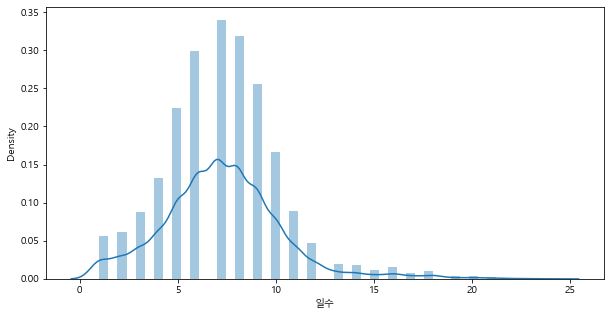

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns
font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

plt.figure(figsize=(10, 5))
ax = sns.distplot(df["duration"])
ax.set_xlabel("일수")
plt.show()

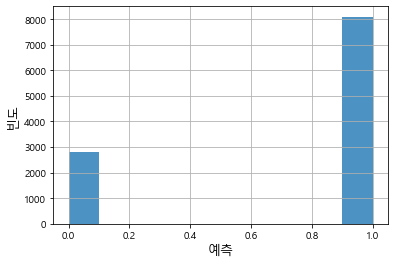

In [16]:
plt.hist(df["pred"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

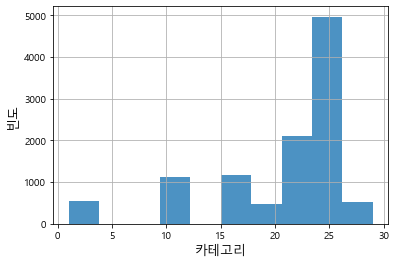

In [17]:
plt.hist(df["category"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("카테고리", fontsize=13)
plt.grid()
plt.show()

In [18]:
df["category"].value_counts()

24    3690
22    1487
10    1131
17     944
25     891
23     621
1      393
20     389
26     384
27     267
15     233
28     230
2      152
19      91
29      18
Name: category, dtype: int64

In [19]:
#데이터가 딱 두개로 나뉘는 이쁜 형태가 아님.
df["pred"].value_counts()

1    8097
0    2824
Name: pred, dtype: int64

## 데이터 샘플링

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [21]:
X=df[["category", "publishedAt_week", "tags_len", "view_count", "play_time", "likes", "dislikes",
      "comment_count", "comments_disabled", "ratings_disabled", "description", "video_len", "channel_len"]]
Y=df["pred"]

In [22]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, Y)

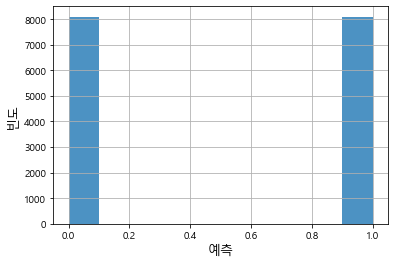

In [23]:
plt.hist(y_resampled, bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

Text(0.5, 0, '종속변수')

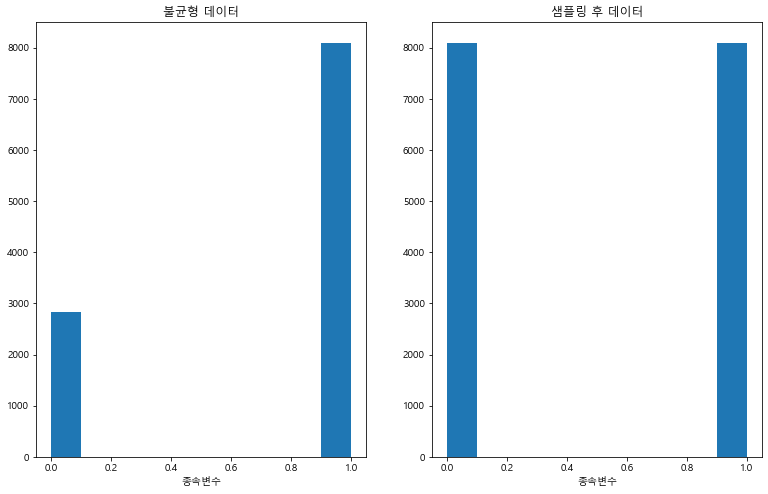

In [24]:
fig = plt.figure(figsize=(13, 8))
axes1 = fig.add_subplot(1, 2, 1)
axes1.hist(Y)
axes1.set_title('불균형 데이터')
axes1.set_xlabel('종속변수')

axes1 = fig.add_subplot(1, 2, 2)
axes1.hist(y_resampled)
axes1.set_title('샘플링 후 데이터')
axes1.set_xlabel('종속변수')

##  train_test 분리

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [26]:
x_train.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
1861,22,0,103,249693,30,48555,78,1171,0,0,1,48,25
7684,22,2,13,577305,442,10553,252,4154,0,0,1,25,3
4353,24,2,1,81367,245,6025,50,776,0,0,1,38,7
14223,20,2,13,301381,481,6750,87,1095,0,0,1,23,10
12351,17,2,15,282385,145,16979,330,1264,0,0,0,49,10


In [27]:
#스케일
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_test_scaled

array([[ 0.60034304,  0.63891279,  4.53480256, ...,  0.1794755 ,
         0.34734359, -0.65721318],
       [ 0.60034304, -0.44923695, -0.38611938, ...,  0.1794755 ,
         0.10942495,  1.36504526],
       [ 0.60034304, -1.53738669, -0.11273483, ...,  0.1794755 ,
         1.34660191,  0.01687297],
       ...,
       [ 0.43749929,  1.18298766,  0.0512959 , ...,  0.1794755 ,
         1.20385073, -0.15164857],
       [ 0.60034304, -0.44923695,  1.63692631, ...,  0.1794755 ,
         1.06109954,  1.5335668 ],
       [ 0.27465553,  0.09483792,  2.1290185 , ...,  0.1794755 ,
         0.29975986,  2.37617448]])

## 지도학습_분류분석

### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
knn_train_pred = knn.predict(x_train_scaled)
knn_test_pred = knn.predict(x_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score
print("knn train 정확도 : {0:.3f}".format(accuracy_score(y_train, knn_train_pred)))
print("knn test  정확도 : {0:.3f}".format(accuracy_score(y_test, knn_test_pred)))

knn train 정확도 : 0.779
knn test  정확도 : 0.667


In [31]:
from sklearn.metrics import confusion_matrix

print("KNN train\n", confusion_matrix(y_train, knn_train_pred))
print()
print("KNN test\n", confusion_matrix(y_test, knn_test_pred))

KNN train
 [[4801 1244]
 [1434 4666]]

KNN test
 [[1402  650]
 [ 697 1300]]


In [32]:
train_sc = []
test_sc = []
len_sc=[]

for k in range(1,15):
    k_knn = KNeighborsClassifier(n_neighbors=k)
    k_knn.fit(x_train_scaled, y_train)
    k_pred = k_knn.predict(x_test_scaled)
    train_sc.append(k_knn.score(x_train_scaled, y_train))
    test_sc.append((k_pred==y_test).mean())
    len_sc.append(k)

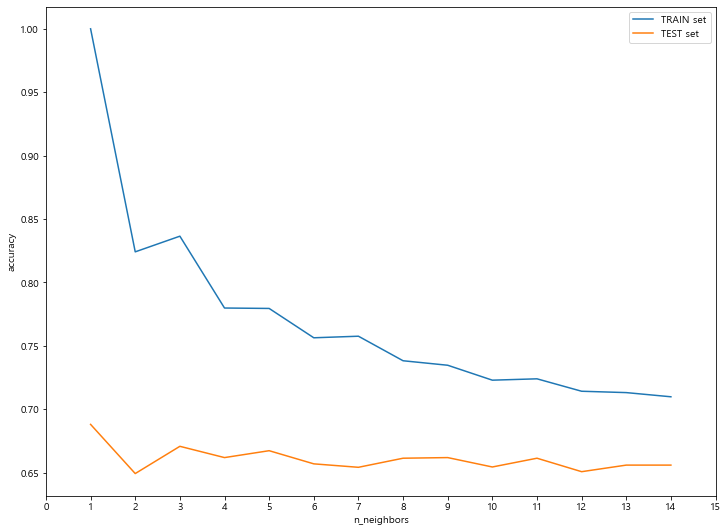

In [33]:
plt.figure(figsize=(12, 9))
plt.plot(len_sc, train_sc, label='TRAIN set')
plt.plot(len_sc, test_sc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [34]:
#k값 찾아서 넣기
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_train_scaled, y_train)
knn_train_pred1 = knn1.predict(x_train_scaled)
knn_test_pred1 = knn1.predict(x_test_scaled)

In [35]:
print("KNN k값 train 정확도 : {0:.3f}".format(accuracy_score(y_train, knn_train_pred1)))
print("KNN k값 test  정확도 : {0:.3f}".format(accuracy_score(y_test, knn_test_pred1)))

KNN k값 train 정확도 : 0.824
KNN k값 test  정확도 : 0.649


In [36]:
print("KNN train\n", confusion_matrix(y_train, knn_train_pred1))
print()
print("KNN test\n", confusion_matrix(y_test, knn_test_pred1))

KNN train
 [[6045    0]
 [2136 3964]]

KNN test
 [[1744  308]
 [1112  885]]


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components' : range(1, 8),
    'clf__n_neighbors' : range(1, 5)
}

kf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs= -1, verbose=1)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': range(1, 5),
                         'pca__n_components': range(1, 8)},
             verbose=1)

In [38]:
print('Best scroe : %0.3f' %grid.best_score_)
print('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r'%(param_name, best_parameters[param_name]))

Best scroe : 0.642
Best parameters set:
	clf__n_neighbors: 1
	pca__n_components: 7


In [39]:
accuracy_score(y_test, grid.best_estimator_.predict(x_test_scaled))

0.6670782909360335

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_train, grid.predict(x_train_scaled))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6045\n           1       1.00      1.00      1.00      6100\n\n    accuracy                           1.00     12145\n   macro avg       1.00      1.00      1.00     12145\nweighted avg       1.00      1.00      1.00     12145\n'

In [41]:
print("KNN k값 train 정확도 : {0:.3f}".format(accuracy_score(y_train,grid.predict(x_train_scaled))))
print("KNN k값 test  정확도 : {0:.3f}".format(accuracy_score(y_test, grid.predict(x_test_scaled))))

KNN k값 train 정확도 : 1.000
KNN k값 test  정확도 : 0.667


In [42]:
print("KNN train\n", confusion_matrix(y_train, grid.predict(x_train_scaled)))
print()
print("KNN test\n", confusion_matrix(y_test, grid.predict(x_test_scaled)))

KNN train
 [[6045    0]
 [   0 6100]]

KNN test
 [[1365  687]
 [ 661 1336]]


### LDA
- 2개이상 범주때 사용, 이 범주가 명확할수록 좋음

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_scaled, y_train)
lda_train_pred = lda.predict(x_train_scaled)
lda_test_pred = lda.predict(x_test_scaled)

In [44]:
print("LDA train 정확도 : {0:.3f}".format(accuracy_score(y_train, lda_train_pred)))
print("LDA test  정확도 : {0:.3f}".format(accuracy_score(y_test, lda_test_pred)))

LDA train 정확도 : 0.560
LDA test  정확도 : 0.553


In [45]:
print("LDA 전체 train\n", confusion_matrix(y_train, lda_train_pred))
print()
print("LDA 전체 test\n", confusion_matrix(y_test, lda_test_pred))

LDA 전체 train
 [[2922 3123]
 [2226 3874]]

LDA 전체 test
 [[1019 1033]
 [ 775 1222]]


### SVM
- 어느 한쪽에 치우쳐지지 않고 양쪽에 균등할 경우 사용
- 과적합 적음

In [46]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_scaled, y_train)
svm_train_pred = svm.predict(x_train_scaled)
svm_test_pred = svm.predict(x_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score
print("svm train 정확도 : {0:.3f}".format(accuracy_score(y_train, svm_train_pred)))
print("svm test  정확도 : {0:.3f}".format(accuracy_score(y_test, svm_test_pred)))

svm train 정확도 : 0.663
svm test  정확도 : 0.649


In [48]:
from sklearn.metrics import confusion_matrix

print("SVM train\n", confusion_matrix(y_train, svm_train_pred))
print()
print("SVM test\n", confusion_matrix(y_test, svm_test_pred))

SVM train
 [[3792 2253]
 [1843 4257]]

SVM test
 [[1298  754]
 [ 666 1331]]
